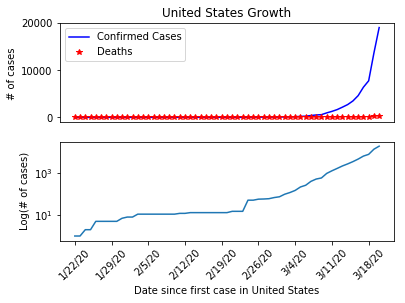

In [35]:
# Coronavirus statistical analysis - Started March 12 2013 at 10:29 PM
# Scratch code file

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

try:
    confirmed_df = pd.read_csv(
        'COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv')
except IOError:
    print("Dataset not available, please clone repo listed in README")
    exit()
try:
    deaths_df = pd.read_csv(
        'COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv')
except IOError:
    print("Dataset not available, please clone repo listed in README")
    exit()

#cutting out all non-US data from dataframe
df = confirmed_df[confirmed_df['Country/Region'] == 'US']
df2 = deaths_df[deaths_df['Country/Region'] == 'US']
# Dropping all columns except dates
df_US_conf = df.drop(columns=['Province/State', 'Country/Region', 'Lat', 'Long'])
df_US_dead = df2.drop(columns=['Province/State', 'Country/Region', 'Lat', 'Long'])
# summing data for each date
US_conf_column_totals = df_US_conf.sum()
US_dead_column_totals = df_US_dead.sum()
#creating a new pandas DataFrame with only the US totals
US_frame_conf = {'US Total':US_conf_column_totals}
df_US_conf = pd.DataFrame(US_frame_conf)
US_frame_dead = {'US Total':US_dead_column_totals}
df_US_dead = pd.DataFrame(US_frame_dead)
# Plotting the US Data
# plt.plot(t, t, 'r--', t, t**2, 'bs', t, t**3, 'g^')
fig = plt.figure()
plt.subplot(211)
plt.title('United States Growth')
plt.xticks([])
plt.ylabel('# of cases ')
plt.plot(df_US_conf,'b-', label='Confirmed Cases')
plt.plot(df_US_dead, 'r*', label='Deaths')
plt.legend()

plt.subplot(212)
plt.yscale('log')
plt.xticks(np.arange(0,len(df_US_conf),step=7), rotation=45)
plt.xlabel(xlabel='Date since first case in United States')
plt.ylabel('Log(# of cases)')
plt.plot(df_US_conf)
plt.show()

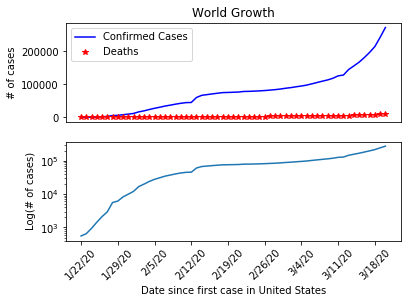

In [34]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

try:
    confirmed_df = pd.read_csv(
        'COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv')
except IOError:
    print("Dataset not available, please clone repo listed in README")
    exit()
try:
    deaths_df = pd.read_csv(
        'COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv')
except IOError:
    print("Dataset not available, please clone repo listed in README")
    exit()
# Dropping all columns except dates
df_world_conf = confirmed_df.drop(columns=['Province/State', 'Country/Region', 'Lat', 'Long'])
df_world_dead = deaths_df.drop(columns=['Province/State', 'Country/Region', 'Lat', 'Long'])
# summing data for each date
world_column_totals_conf = df_world_conf.sum()
world_column_totals_dead = df_world_dead.sum()
#creating a new pandas DataFrame with World totals
world_frame_conf = {'World Total':world_column_totals_conf}
df_world_conf = pd.DataFrame(world_frame_conf)
world_frame_dead = {'World Total':world_column_totals_dead}
df_world_dead = pd.DataFrame(world_frame_dead)
# Plotting the World Data
fig = plt.figure()
plt.subplot(211)
plt.title('World Growth')
plt.xticks([])
plt.ylabel('# of cases')
plt.plot(df_world_conf, 'b-', label='Confirmed Cases')
plt.plot(df_world_dead, 'r*', label='Deaths')
plt.legend()

plt.subplot(212)
plt.yscale('log')
plt.xticks(np.arange(0,len(df_world_conf),step=7), rotation=45)
plt.xlabel(xlabel='Date since first case in United States')
plt.ylabel('Log(# of cases)')
plt.plot(df_world_conf)
plt.show()

# Exponential Growth Model
### N = number of cases on a given day
### E = average number of people one infected person is exposed to in one day
### p = probability of each exposure becoming an infection
### ∆N = E*p*N, where E*p = R which is the growth factor = (daily new cases)/(previous daily new cases)
### *a ratio between two successive changes*
### So we can set the equation: N(t) = R*N0^t, where N0 is the initial value and t is the number of days since the outbreak
### but since we want to include the people already infected, we should use logistic Model
### so we'll get dN/dt = c(1-(N(t)/P))*N(t)

# Growth Factor

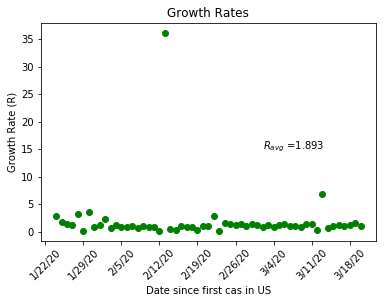

In [9]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

try:
    confirmed_df = pd.read_csv(
        'COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv')
except IOError:
    print("Dataset not available, please clone repo listed in README")
    exit()

# Dropping all columns except dates
df_world = confirmed_df.drop(columns=['Province/State', 'Country/Region', 'Lat', 'Long'])

# summing data for each date
world_column_totals = df_world.sum()

#creating a new pandas DataFrame with World totals
world_frame = {'World Total':world_column_totals}
df_world = pd.DataFrame(world_frame)
df_world['diff'] = df_world['World Total'].diff()
df_world['shift'] = df_world['diff'].shift(1)
df_world['R'] = df_world['diff']/df_world['shift']
average_growth_rate = np.nanmean(df_world['R'])
R_avg = round(average_growth_rate, 3)
# print(average_growth_rate)
fig = plt.figure()
plt.title('Growth Rates')
plt.xticks(np.arange(0,len(df_world),step=7), rotation=45)
plt.xlabel('Date since first cas in US')
plt.ylabel('Growth Rate (R)')
plt.text(40,15,'$R_{avg}$ =' + str(R_avg))
plt.plot(df_world['R'], 'go')
plt.show()